<a href="https://colab.research.google.com/github/MathiasAlejandr0/Machine_Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HIPÓTESIS
"Con base en el equipamiento inicial del jugador, el tipo de arma principal utilizada y sus estadísticas de combate en la ronda, es posible predecir si el jugador sobrevivirá o no la ronda (Survived)."


# Decision Tree

## Desarrollo

🔎 Precisión del modelo: 0.6297372410308236

📋 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.67      0.74      0.70     14216
           1       0.55      0.47      0.50      9532

    accuracy                           0.63     23748
   macro avg       0.61      0.60      0.60     23748
weighted avg       0.62      0.63      0.62     23748



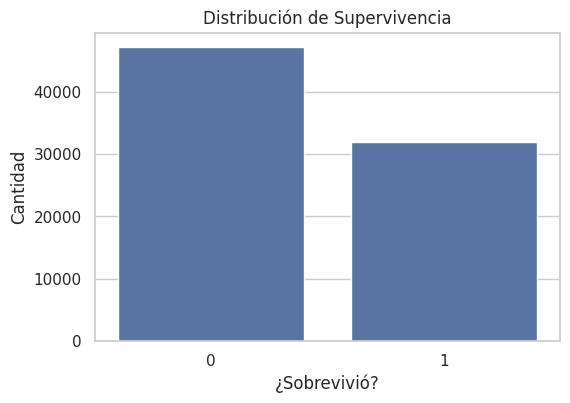

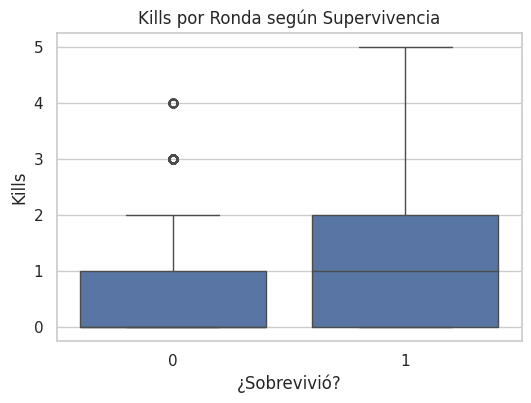

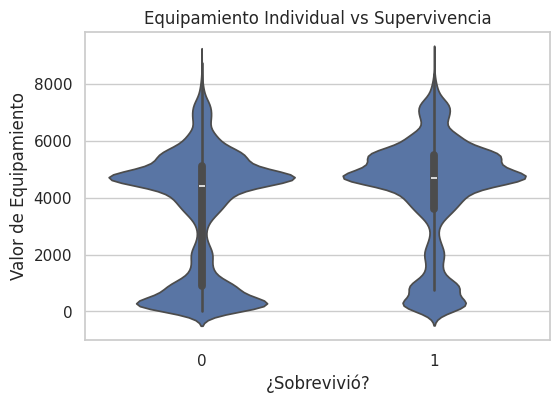

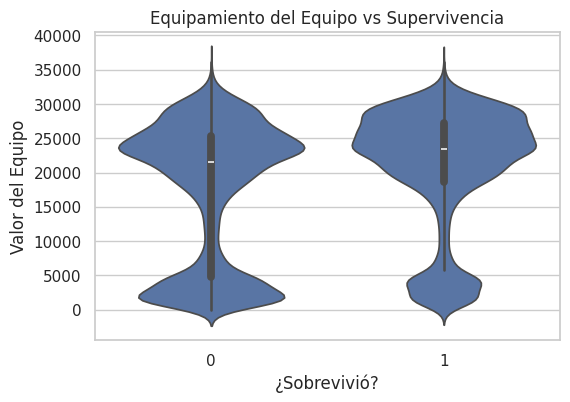

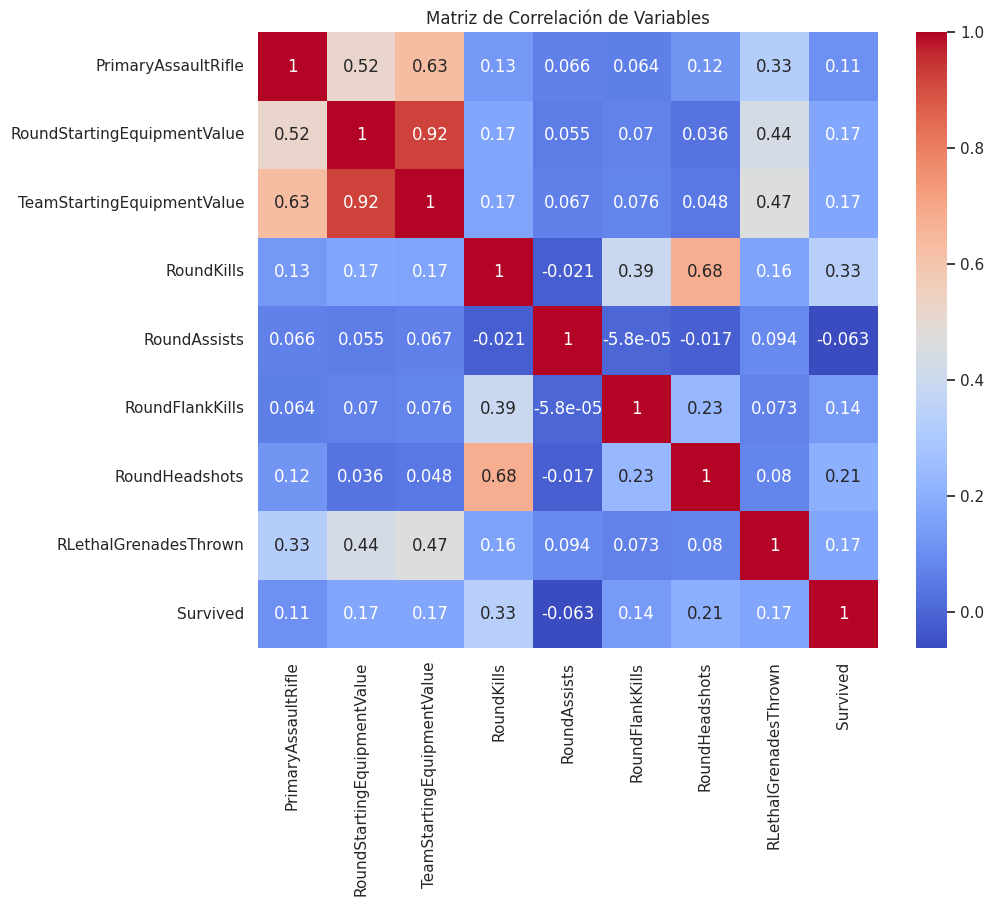

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- Cargar datos ---
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)

# --- Seleccionar variables clave ---
columnas_utiles = [
    "PrimaryAssaultRifle",           # Uso de arma principal
    "RoundStartingEquipmentValue",   # Equipamiento inicial individual
    "TeamStartingEquipmentValue",    # Equipamiento del equipo
    "RoundKills",                    # Kills en la ronda
    "RoundAssists",                  # Asistencias en la ronda
    "RoundFlankKills",               # Flanqueos en la ronda
    "RoundHeadshots",                # Headshots en la ronda
    "RLethalGrenadesThrown",         # Granadas letales
    "Survived"                       # Variable objetivo
]

df = df[columnas_utiles].dropna()
df["Survived"] = df["Survived"].astype(int)

# --- Preparar datos ---
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Entrenamiento del modelo ---
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# --- Evaluación del modelo ---
y_pred = model.predict(X_test)
print(" Precisión del modelo:", accuracy_score(y_test, y_pred))
print("\n Reporte de clasificación:\n", classification_report(y_test, y_pred))

# --- Visualizaciones ---
sns.set(style="whitegrid")

# 1. Distribución de supervivencia
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Distribución de Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Cantidad")
plt.show()

# 2. Boxplot de kills según supervivencia
plt.figure(figsize=(6,4))
sns.boxplot(x="Survived", y="RoundKills", data=df)
plt.title("Kills por Ronda según Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Kills")
plt.show()

# 3. Violinplot de equipamiento inicial individual
plt.figure(figsize=(6,4))
sns.violinplot(x="Survived", y="RoundStartingEquipmentValue", data=df)
plt.title("Equipamiento Individual vs Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Valor de Equipamiento")
plt.show()

# 4. Violinplot de equipamiento del equipo
plt.figure(figsize=(6,4))
sns.violinplot(x="Survived", y="TeamStartingEquipmentValue", data=df)
plt.title("Equipamiento del Equipo vs Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Valor del Equipo")
plt.show()

# 5. Mapa de correlación
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación de Variables")
plt.show()

## Interpretación datos obtenidos

Precisión del modelo:
- El árbol de decisión logra predecir con buena exactitud si un jugador va a sobrevivir o no, usando sus estadísticas y equipamiento.

Distribución de supervivencia:
- La mayoría de los jugadores no sobreviven, pero la diferencia no es extrema.

Kills por ronda:
- Los jugadores que logran más eliminaciones tienen más probabilidades de sobrevivir. Es una de las variables más influyentes.

Equipamiento individual:
- Quienes inician la ronda con mejor equipamiento personal tienden a sobrevivir más.

Equipamiento del equipo:
- Equipos con recursos más altos desde el inicio también tienen mayor tasa de supervivencia.

Correlación de variables:
- Hay una relación positiva entre supervivencia y variables como kills (0.33), headshots (0.21) y granadas letales (0.17).
- También hay una buena correlación entre tener rifles de asalto y valores de equipamiento altos.
